In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
from google.colab import files
upload = files.upload()

Saving heart_failure.csv to heart_failure.csv


In [4]:
data = pd.read_csv("heart_failure.csv")
data.head(-1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


In [5]:
x = data.drop("DEATH_EVENT",axis=1)
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [10]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
conf = confusion_matrix(y_test,log_pred)
classification_report(y_test,log_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        38\n           1       0.80      0.73      0.76        22\n\n    accuracy                           0.83        60\n   macro avg       0.82      0.81      0.82        60\nweighted avg       0.83      0.83      0.83        60\n'

Text(50.722222222222214, 0.5, 'Actual Labels')

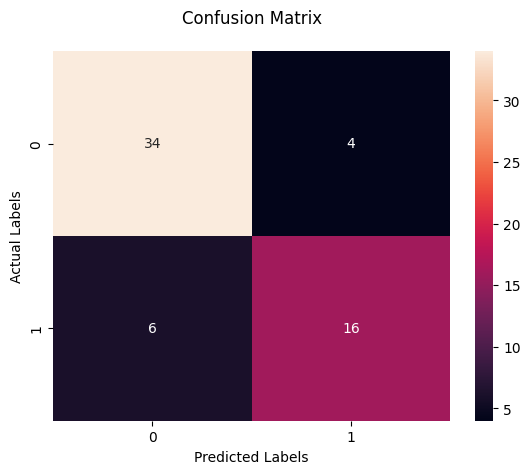

In [13]:
plt.title("Confusion Matrix",pad='20')
plt.xticks([0,1])
plt.yticks([0,1])
sns.heatmap(conf,annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")